In [24]:
#Social_Network_Ads.csv

**Importing the libraries**

In [25]:
import pandas as pd
from sklearn import preprocessing,model_selection,ensemble,metrics

**Importing the dataset**

In [26]:
df=pd.read_csv("/content/Social_Network_Ads.csv")

In [27]:
#df.drop(columns="User ID",inplace=True)
df.drop(columns=["User ID","Gender"],inplace=True)

In [28]:
#a=preprocessing.LabelEncoder()
#df["Gender"]=a.fit_transform(df["Gender"])

**Splitting the dataset into the Training set and Test set**

In [29]:
#x_train,x_test,y_train,y_test=model_selection.train_test_split(df[["Gender","Age","EstimatedSalary"]],df["Purchased"])
x_train,x_test,y_train,y_test=model_selection.train_test_split(df[["Age","EstimatedSalary"]],df["Purchased"])

**Feature Scaling**

In [30]:
sca=preprocessing.StandardScaler()
x_train_sca=sca.fit_transform(x_train)
x_test_sca=sca.transform(x_test)

**Fitting Random Forest to the Training set**

In [31]:
clf=ensemble.RandomForestClassifier()
clf=clf.fit(x_train_sca,y_train)

**Predicting the Test set results**

In [32]:
y_predic=clf.predict(x_test_sca)

In [33]:
metrics.accuracy_score(y_test,y_predic)

0.91

**Making the Confusion Matrix**

In [34]:
metrics.confusion_matrix(y_test,y_predic)

array([[57,  6],
       [ 3, 34]])

**Visualising the Training set results**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


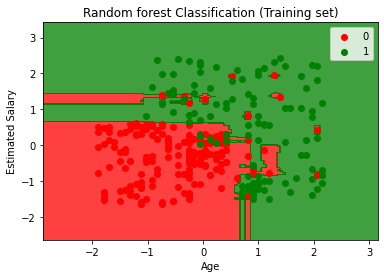

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
X_set, y_set =x_train_sca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Visualising the Test set results**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


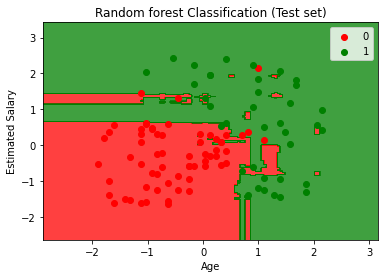

In [36]:
X_set, y_set = x_test_sca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()